In [1]:
pip install pyspark


In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()


In [6]:
df=spark.read.csv('/content/animal-shelter-intakes-and-outcomes.csv',header=True)
df.show()

+---------+----------------+-----------+-------------+---------------+--------+----------+-----------+-----------------+---------------+--------------+------------+--------------------+------------+--------------------+---------------+----------+------------+---------------+---------------+-----------------+--------------------+
|Animal ID|     Animal Name|Animal Type|Primary Color|Secondary Color|     Sex|       DOB|Intake Date| Intake Condition|    Intake Type|Intake Subtype|Outcome Date|            Crossing|Jurisdiction|        Outcome Type|Outcome Subtype|  latitude|   longitude| intake_is_dead|outcome_is_dead|was_outcome_alive|            geopoint|
+---------+----------------+-----------+-------------+---------------+--------+----------+-----------+-----------------+---------------+--------------+------------+--------------------+------------+--------------------+---------------+----------+------------+---------------+---------------+-----------------+--------------------+
|  A635

In [7]:
df.printSchema()

root
 |-- Animal ID: string (nullable = true)
 |-- Animal Name: string (nullable = true)
 |-- Animal Type: string (nullable = true)
 |-- Primary Color: string (nullable = true)
 |-- Secondary Color: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Intake Date: string (nullable = true)
 |-- Intake Condition: string (nullable = true)
 |-- Intake Type: string (nullable = true)
 |-- Intake Subtype: string (nullable = true)
 |-- Outcome Date: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Jurisdiction: string (nullable = true)
 |-- Outcome Type: string (nullable = true)
 |-- Outcome Subtype: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- intake_is_dead: string (nullable = true)
 |-- outcome_is_dead: string (nullable = true)
 |-- was_outcome_alive: string (nullable = true)
 |-- geopoint: string (nullable = true)



In [8]:
print(df.count())

14772


In [9]:
print(df.columns)

['Animal ID', 'Animal Name', 'Animal Type', 'Primary Color', 'Secondary Color', 'Sex', 'DOB', 'Intake Date', 'Intake Condition', 'Intake Type', 'Intake Subtype', 'Outcome Date', 'Crossing', 'Jurisdiction', 'Outcome Type', 'Outcome Subtype', 'latitude', 'longitude', 'intake_is_dead', 'outcome_is_dead', 'was_outcome_alive', 'geopoint']


In [10]:
df.describe()

DataFrame[summary: string, Animal ID: string, Animal Name: string, Animal Type: string, Primary Color: string, Secondary Color: string, Sex: string, DOB: string, Intake Date: string, Intake Condition: string, Intake Type: string, Intake Subtype: string, Outcome Date: string, Crossing: string, Jurisdiction: string, Outcome Type: string, Outcome Subtype: string, latitude: string, longitude: string, intake_is_dead: string, outcome_is_dead: string, was_outcome_alive: string, geopoint: string]

14772

In [11]:
df.select('Animal ID').distinct().show()

+---------+
|Animal ID|
+---------+
|  A590316|
|  A589089|
|  A591104|
|  A445853|
|  A647616|
|  A691569|
|  A707988|
|  A638480|
|  A686773|
|  A624631|
|  A518350|
|  A691317|
|  A649902|
|  A705327|
|  A634135|
|  A713588|
|  A671578|
|  A609975|
|  A638946|
|  A664963|
+---------+
only showing top 20 rows



In [12]:
df.select('Animal Name').distinct().show()

+-------------+
|  Animal Name|
+-------------+
|     *POPTART|
|        ZIGGY|
|       WOLFIE|
|         KIKI|
|       LITTLE|
|       HUNTER|
|A628231*AMBER|
|       SHUGAR|
|    *ESPRESSO|
|    PRINCETON|
|     *CAMERON|
|         JADE|
|      MAXWELL|
|*BANANNA BLUE|
|      *TURTLE|
|        SPICE|
|         BINX|
|       *EBONY|
|       *GRETA|
|        GIZMO|
+-------------+
only showing top 20 rows



In [13]:
df.select('Animal Type').distinct().show()

+-----------+
|Animal Type|
+-----------+
|        DOG|
|        CAT|
|       NULL|
+-----------+



In [14]:
df=df.na.fill(0)
df.show

<bound method DataFrame.show of DataFrame[Animal ID: string, Animal Name: string, Animal Type: string, Primary Color: string, Secondary Color: string, Sex: string, DOB: string, Intake Date: string, Intake Condition: string, Intake Type: string, Intake Subtype: string, Outcome Date: string, Crossing: string, Jurisdiction: string, Outcome Type: string, Outcome Subtype: string, latitude: string, longitude: string, intake_is_dead: string, outcome_is_dead: string, was_outcome_alive: string, geopoint: string]>

In [38]:
df_cleaned = df.dropna(subset=["Animal Name", "Intake Date"])

# Fill missing values in other columns like 'Secondary Color' with a default value
df_cleaned = df.fillna({"Secondary Color": "Unknown"})

In [39]:
from pyspark.sql.functions import to_date

# Convert date columns to proper date format
df_cleaned = df_cleaned.withColumn("DOB", to_date(df["DOB"], "yyyy-MM-dd"))
df_cleaned = df_cleaned.withColumn("Intake Date", to_date(df["Intake Date"], "yyyy-MM-dd"))
df_cleaned = df_cleaned.withColumn("Outcome Date", to_date(df["Outcome Date"], "yyyy-MM-dd"))

df_cleaned.printSchema()


root
 |-- Animal ID: string (nullable = true)
 |-- Animal Name: string (nullable = true)
 |-- Animal Type: string (nullable = true)
 |-- Primary Color: string (nullable = true)
 |-- Secondary Color: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- DOB: date (nullable = true)
 |-- Intake Date: date (nullable = true)
 |-- Intake Condition: string (nullable = true)
 |-- Intake Type: string (nullable = true)
 |-- Intake Subtype: string (nullable = true)
 |-- Outcome Date: date (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Jurisdiction: string (nullable = true)
 |-- Outcome Type: string (nullable = true)
 |-- Outcome Subtype: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- intake_is_dead: string (nullable = true)
 |-- outcome_is_dead: string (nullable = true)
 |-- was_outcome_alive: string (nullable = true)
 |-- geopoint: string (nullable = true)



In [20]:
from pyspark.sql.functions import first

grouped_df = df.groupBy("Animal ID").agg(first("Animal Type").alias("Animal Type"))
grouped_df.show()

+---------+-----------+
|Animal ID|Animal Type|
+---------+-----------+
|     NULL|       NULL|
|  A002500|        DOG|
|  A223959|        DOG|
|  A229745|        DOG|
|  A252701|        DOG|
|  A275126|        DOG|
|  A279626|        DOG|
|  A283453|        DOG|
|  A283615|        DOG|
|  A288844|        DOG|
|  A306552|        DOG|
|  A307318|        DOG|
|  A320668|        DOG|
|  A331451|        DOG|
|  A331619|        DOG|
|  A332072|        DOG|
|  A343907|        DOG|
|  A346750|        DOG|
|  A359367|        DOG|
|  A362312|        DOG|
+---------+-----------+
only showing top 20 rows



In [19]:
from pyspark.sql.functions import first

grouped_df = df.groupBy("Animal ID").agg(first("Animal Name").alias("Animal Name"))
grouped_df.show()

+---------+-----------+
|Animal ID|Animal Name|
+---------+-----------+
|     NULL|       NULL|
|  A002500|   PENELOPE|
|  A223959|      SUGAR|
|  A229745|   PRECIOUS|
|  A252701|    UNKNOWN|
|  A275126|       CUJO|
|  A279626|       LANE|
|  A283453|      CISCO|
|  A283615|       TOBY|
|  A288844|      MOLLY|
|  A306552|     JAVIER|
|  A307318|      DEWEY|
|  A320668|       HULK|
|  A331451|     PRINCE|
|  A331619|    SCRUFFY|
|  A332072|       ZOEY|
|  A343907|      GOOFY|
|  A346750|       LILO|
|  A359367|    COCQUIS|
|  A362312|     BOWSER|
+---------+-----------+
only showing top 20 rows



In [40]:
from pyspark.sql.functions import year, datediff

# Calculate the age in days based on DOB and Intake Date
df_cleaned = df_cleaned.withColumn("age_at_intake", datediff(df_cleaned["Intake Date"], df_cleaned["DOB"]))

# Average age at intake by animal type
df_cleaned.groupBy("Animal Type").avg("age_at_intake").show()


+-----------+------------------+
|Animal Type|avg(age_at_intake)|
+-----------+------------------+
|        DOG|              NULL|
|        CAT|              NULL|
+-----------+------------------+



In [41]:
df_cleaned.groupBy("Intake Condition", "Intake Type").count().show()


+------------------+---------------+-----+
|  Intake Condition|    Intake Type|count|
+------------------+---------------+-----+
|        ILL SEVERE|     CONFISCATE|    3|
|BEHAVIOR  MODERATE|         RETURN|    4|
|         FRACTIOUS|          STRAY|  115|
|            NORMAL|         RETURN|   43|
|         FRACTIOUS|      SAFE KEEP|    1|
|         FRACTIOUS|     QUARANTINE|    1|
|BEHAVIOR  MODERATE|OWNER SURRENDER|   19|
|     INJURED  MILD|     CONFISCATE|    1|
|  BEHAVIOR  SEVERE|          STRAY|    3|
|BEHAVIOR  MODERATE| WELFARE SEIZED|    1|
|  WELFARE SEIZURES|     CONFISCATE|    6|
|    BEHAVIOR  MILD|          STRAY|    3|
|     INJURED  MILD|         RETURN|    1|
|  UNDER AGE/WEIGHT|          STRAY|  461|
|  BEHAVIOR  SEVERE|OWNER SURRENDER|    9|
|          ILL MILD|     CONFISCATE|    1|
|             FERAL|OWNER SURRENDER|    1|
|          ILL MILD|      SAFE KEEP|    1|
|            NORMAL| WELFARE SEIZED|   67|
|          ILL MILD|          STRAY|  145|
+----------

In [42]:
dogs_df = df_cleaned.filter(df_cleaned["Animal Type"] == "Dog")
dogs_df.show(5)


+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+--------+------------+------------+---------------+--------+---------+--------------+---------------+-----------------+--------+-------------+
|Animal ID|Animal Name|Animal Type|Primary Color|Secondary Color|Sex|DOB|Intake Date|Intake Condition|Intake Type|Intake Subtype|Outcome Date|Crossing|Jurisdiction|Outcome Type|Outcome Subtype|latitude|longitude|intake_is_dead|outcome_is_dead|was_outcome_alive|geopoint|age_at_intake|
+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+--------+------------+------------+---------------+--------+---------+--------------+---------------+-----------------+--------+-------------+
+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+---

In [43]:
from pyspark.sql.functions import lit

df_cleaned.filter(df_cleaned["Intake Date"] > lit("2023-01-01")).show(5)


+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+--------+------------+------------+---------------+--------+---------+--------------+---------------+-----------------+--------+-------------+
|Animal ID|Animal Name|Animal Type|Primary Color|Secondary Color|Sex|DOB|Intake Date|Intake Condition|Intake Type|Intake Subtype|Outcome Date|Crossing|Jurisdiction|Outcome Type|Outcome Subtype|latitude|longitude|intake_is_dead|outcome_is_dead|was_outcome_alive|geopoint|age_at_intake|
+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+--------+------------+------------+---------------+--------+---------+--------------+---------------+-----------------+--------+-------------+
+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+---

In [44]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Define window specification
windowSpec = Window.partitionBy("Animal Type").orderBy(df_cleaned["Intake Date"])

# Add rank based on intake date within each animal type
df_ranked = df_cleaned.withColumn("rank", row_number().over(windowSpec))
df_ranked.show(5)


+---------+-----------+-----------+-------------+---------------+--------+----+-----------+----------------+---------------+--------------+------------+--------------------+------------+--------------------+---------------+----------+------------+---------------+---------------+-----------------+--------------------+-------------+----+
|Animal ID|Animal Name|Animal Type|Primary Color|Secondary Color|     Sex| DOB|Intake Date|Intake Condition|    Intake Type|Intake Subtype|Outcome Date|            Crossing|Jurisdiction|        Outcome Type|Outcome Subtype|  latitude|   longitude| intake_is_dead|outcome_is_dead|was_outcome_alive|            geopoint|age_at_intake|rank|
+---------+-----------+-----------+-------------+---------------+--------+----+-----------+----------------+---------------+--------------+------------+--------------------+------------+--------------------+---------------+----------+------------+---------------+---------------+-----------------+--------------------+------

In [45]:
# Example: Filter animals taken in within a specific geographic area
df_filtered_geo = df_cleaned.filter(
    (df_cleaned["latitude"] > lit(30.0)) &
    (df_cleaned["latitude"] < lit(35.0)) &
    (df_cleaned["longitude"] > lit(-100.0)) &
    (df_cleaned["longitude"] < lit(-90.0))
)
df_filtered_geo.show()


+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+--------+------------+------------+---------------+--------+---------+--------------+---------------+-----------------+--------+-------------+
|Animal ID|Animal Name|Animal Type|Primary Color|Secondary Color|Sex|DOB|Intake Date|Intake Condition|Intake Type|Intake Subtype|Outcome Date|Crossing|Jurisdiction|Outcome Type|Outcome Subtype|latitude|longitude|intake_is_dead|outcome_is_dead|was_outcome_alive|geopoint|age_at_intake|
+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+--------+------------+------------+---------------+--------+---------+--------------+---------------+-----------------+--------+-------------+
+---------+-----------+-----------+-------------+---------------+---+---+-----------+----------------+-----------+--------------+------------+---

In [21]:
df1=df.toPandas()
df1.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Intake Date,Intake Condition,Intake Type,...,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,geopoint
0,A635662,A635662,CAT,ORG TABBY,None,Neutered,04-11-2016,04-11-2019,NORMAL,STRAY,...,"2600 FASHION AVE, LONG BEACH, CA 90810",LONG BEACH,"SHELTER, NEUTER, RETURN",STRAYCATAL,33.8044433,-118.2089339,Alive on Intake,FALSE,1,"33.8044433, -118.2089339"
1,A467379,LOUIE,DOG,BLACK,BROWN,Neutered,31-05-2004,12-05-2017,NORMAL,STRAY,...,"2600 HACKETT AVE, LONG BEACH, CA 90815",LONG BEACH,RETURN TO OWNER,WALKIN,33.8052666,-118.1069613,Alive on Intake,FALSE,1,"33.8052666, -118.1069613"
2,A709976,HARLEY DAVIDSON,DOG,BLACK,None,Neutered,06-11-2020,06-11-2023,NORMAL,WELFARE SEIZED,...,2600 N STUDEBAKER,LONG BEACH,ADOPTION,None,33.8033638,-118.0988918,Alive on Intake,FALSE,1,"33.8033638, -118.0988918"
3,A633274,DAISY,DOG,BLK SMOKE,BLACK,Spayed,01-07-2006,08-09-2019,INJURED MODERATE,STRAY,...,"2600 N STUDEBAKER RD, LONG BEACH, CA 90815",LONG BEACH,RETURN TO OWNER,MICROCHIP,33.8033638,-118.0988918,Alive on Intake,FALSE,1,"33.8033638, -118.0988918"
4,A643898,*MORGAN,DOG,BLACK,BROWN,Spayed,16-06-2012,15-06-2020,INJURED MODERATE,STRAY,...,"2600 N STUDEBAKER RD, LONG BEACH, CA 90815",LONG BEACH,RESCUE,KITTYKATCH,33.8033638,-118.0988918,Alive on Intake,FALSE,1,"33.8033638, -118.0988918"


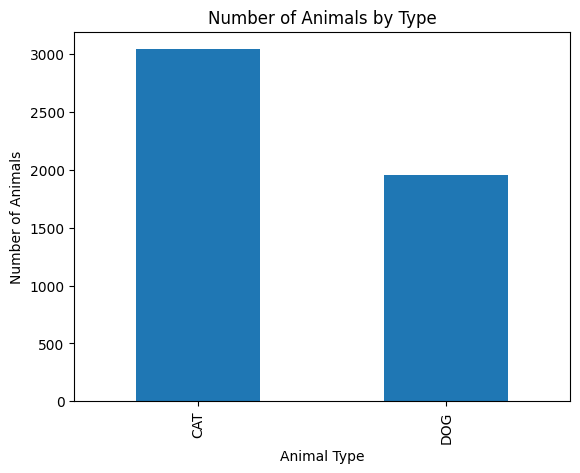

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Animal Type and count the number of occurrences
animal_type_counts = df1.groupby('Animal Type')['Animal ID'].count()

# Plot the data
animal_type_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Animal Type')
plt.ylabel('Number of Animals')
plt.title('Number of Animals by Type')

# Show the plot
plt.show()


In [28]:
# Group by Primary Color and count
primary_color_counts = df1.groupby('Primary Color')['Animal ID'].count()

# Calculate percentage distribution
primary_color_percentage = (primary_color_counts / primary_color_counts.sum()) * 100

# Convert to DataFrame for tabular display
primary_color_percentage_df = primary_color_percentage.reset_index()

# Rename columns for clarity
primary_color_percentage_df.columns = ['Primary Color', 'Percentage (%)']

# Display as a table
print(primary_color_percentage_df)

   Primary Color  Percentage (%)
0        APRICOT        0.060024
1     BL BRINDLE        0.240096
2          BLACK       26.490596
3      BLK SMOKE        0.080032
4      BLK TABBY        0.340136
..           ...             ...
58      TRICOLOR        1.060424
59       UNKNOWN        0.280112
60         WHEAT        0.020008
61         WHITE       12.224890
62        YELLOW        0.120048

[63 rows x 2 columns]


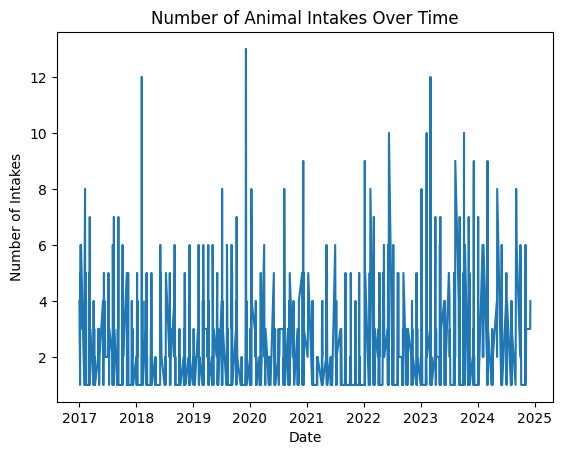

In [30]:
# Ensure Intake Date is in datetime format, with invalid dates set to NaT
df1['Intake Date'] = pd.to_datetime(df1['Intake Date'], errors='coerce')

# Drop rows with NaT in the 'Intake Date' column
df1 = df1.dropna(subset=['Intake Date'])

# Group by date and count the number of intakes
intake_over_time = df1.groupby(df1['Intake Date'].dt.date)['Animal ID'].count()

# Plot the data
intake_over_time.plot(kind='line')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Intakes')
plt.title('Number of Animal Intakes Over Time')

# Show the plot
plt.show()


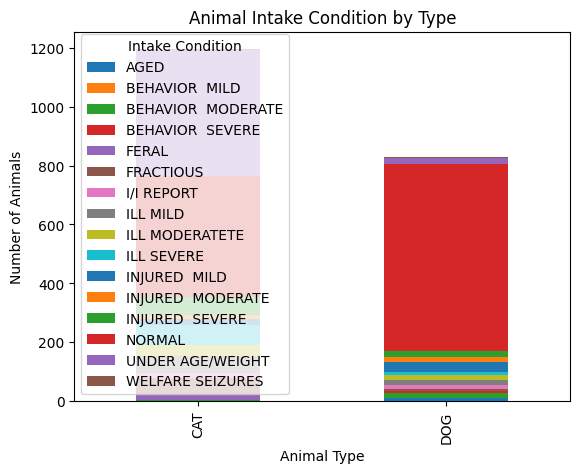

In [31]:
# Group by Animal Type and Intake Condition
intake_condition_by_type = df1.groupby(['Animal Type', 'Intake Condition'])['Animal ID'].count().unstack()

# Plot the data
intake_condition_by_type.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Animal Type')
plt.ylabel('Number of Animals')
plt.title('Animal Intake Condition by Type')

# Show the plot
plt.show()


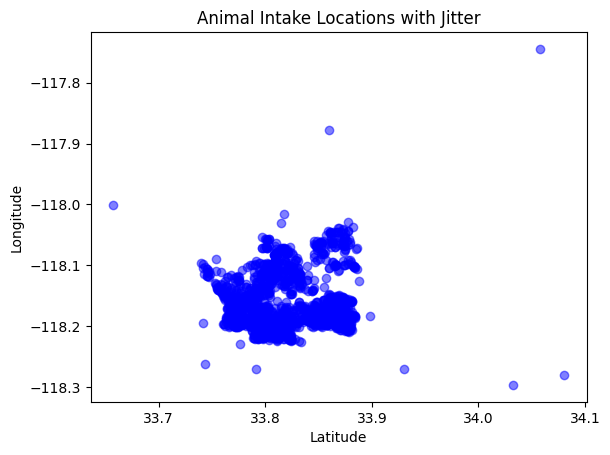

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Add small jitter to latitude and longitude to avoid overlap
jitter = 0.001  # Adjust the jitter value based on your data
df1['latitude_jittered'] = df1['latitude'].astype(float) + np.random.uniform(-jitter, jitter, df1.shape[0])
df1['longitude_jittered'] = df1['longitude'].astype(float) + np.random.uniform(-jitter, jitter, df1.shape[0])

# Plot jittered latitude vs longitude for mapping intake locations
plt.scatter(df1['latitude_jittered'], df1['longitude_jittered'], alpha=0.5, color='blue')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Animal Intake Locations with Jitter')

# Show the plot
plt.show()


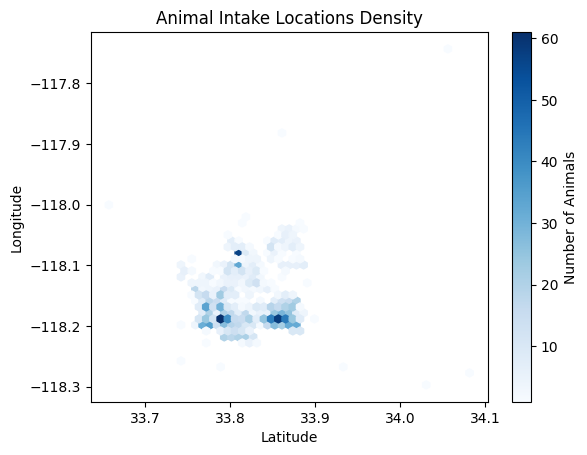